A* Path: [(2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5)]
A* Cost: 7


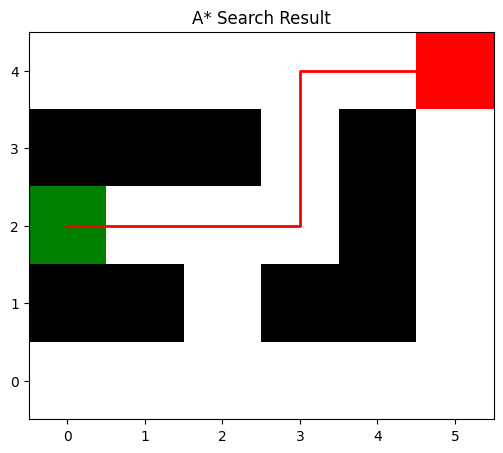

UCS Cost: 7


In [3]:
# --- Imports ---
import heapq
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# --- Utility Functions ---
def locate_position(grid, target):
    """Find coordinates of a specific target in the grid."""
    for r, row in enumerate(grid):
        for c, val in enumerate(row):
            if val == target:
                return (r, c)
    return None

def manhattan(p1, p2):
    """Calculate Manhattan distance between two points."""
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def get_neighbors(grid, row, col):
    """Generate valid neighboring positions (not walls)."""
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for dr, dc in directions:
        nr, nc = row + dr, col + dc
        if 0 <= nr < len(grid) and 0 <= nc < len(grid[0]):
            if grid[nr][nc] != 1:
                yield (nr, nc)

# --- A* Pathfinding ---
def run_astar(grid, heuristic_fn):
    """A* Search algorithm with a customizable heuristic function."""
    start = locate_position(grid, 'A')
    goal = locate_position(grid, 'B')
    if not start or not goal:
        raise Exception("Start or Goal not found in grid.")

    open_set = []
    g_cost = {start: 0}
    came_from = {}
    counter = 0

    heapq.heappush(open_set, (heuristic_fn(start), counter, start))
    visited = set()

    while open_set:
        _, _, current = heapq.heappop(open_set)
        if current in visited:
            continue

        if current == goal:
            # Trace back the path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return list(reversed(path)), g_cost[goal]

        visited.add(current)
        for neighbor in get_neighbors(grid, *current):
            new_cost = g_cost[current] + 1
            if neighbor not in g_cost or new_cost < g_cost[neighbor]:
                g_cost[neighbor] = new_cost
                came_from[neighbor] = current
                counter += 1
                priority = new_cost + heuristic_fn(neighbor)
                heapq.heappush(open_set, (priority, counter, neighbor))

    return None, math.inf

# --- Uniform Cost Search ---
def run_ucs(grid):
    """Uniform Cost Search without heuristic."""
    start = locate_position(grid, 'A')
    goal = locate_position(grid, 'B')
    if not start or not goal:
        raise Exception("Start or Goal not found in grid.")

    queue = [(0, start)]
    min_cost = {start: 0}

    while queue:
        cost, current = heapq.heappop(queue)
        if current == goal:
            return cost

        for neighbor in get_neighbors(grid, *current):
            total = cost + 1
            if neighbor not in min_cost or total < min_cost[neighbor]:
                min_cost[neighbor] = total
                heapq.heappush(queue, (total, neighbor))

    return math.inf

# --- Visualization ---
def show_grid(grid, path=None, title="Pathfinding Grid"):
    """Visualize the grid and optionally overlay a solution path."""
    colormap = ListedColormap(['black', 'white', 'green', 'red'])
    visual = []

    for row in grid:
        visual_row = []
        for cell in row:
            if cell == 1:
                visual_row.append(0)  # Wall
            elif cell == 'A':
                visual_row.append(2)  # Start
            elif cell == 'B':
                visual_row.append(3)  # Goal
            else:
                visual_row.append(1)  # Empty space
        visual.append(visual_row)

    visual = np.array(visual)
    plt.figure(figsize=(6, 6))
    plt.imshow(visual, cmap=colormap, interpolation='nearest')

    if path:
        x_coords = [p[1] for p in path]
        y_coords = [p[0] for p in path]
        plt.plot(x_coords, y_coords, color='red', linewidth=2)

    plt.title(title)
    plt.gca().invert_yaxis()
    plt.grid(False)
    plt.show()

# --- Example Grid ---
example_grid = [
    [0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 0],
    ['A', 0, 0, 0, 1, 0],
    [1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 'B'],
]

start_point = locate_position(example_grid, 'A')
end_point = locate_position(example_grid, 'B')

# Run A* with Manhattan Distance
path, total_cost = run_astar(example_grid, lambda p: manhattan(p, end_point))
print("A* Path:", path)
print("A* Cost:", total_cost)
show_grid(example_grid, path, title="A* Search Result")

# Run UCS
ucs_cost = run_ucs(example_grid)
print("UCS Cost:", ucs_cost)


Baseline Manhattan (L1)
Path: [(2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5)]
Cost: 7
Optimal Cost: 7 | Optimal?: True


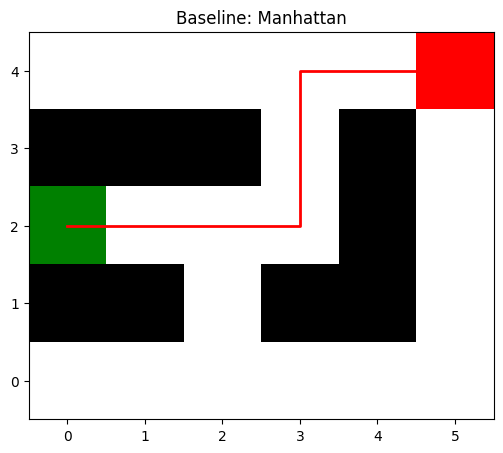

In [5]:
# --- Case 0: Baseline Manhattan (L1) Heuristic ---
end_point = locate_position(example_grid, 'B')
manhattan_heuristic = lambda node: manhattan(node, end_point)

path_case0, cost_case0 = run_astar(example_grid, manhattan_heuristic)
optimal_cost = run_ucs(example_grid)

print("Baseline Manhattan (L1)")
print("Path:", path_case0)
print("Cost:", cost_case0)
print("Optimal Cost:", optimal_cost, "| Optimal?:", cost_case0 == optimal_cost)

show_grid(example_grid, path_case0, title="Baseline: Manhattan")


Heuristic: 1.5 × Manhattan
Path: [(2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5)]
Cost: 7
Optimal Cost: 7 | Optimal?: True


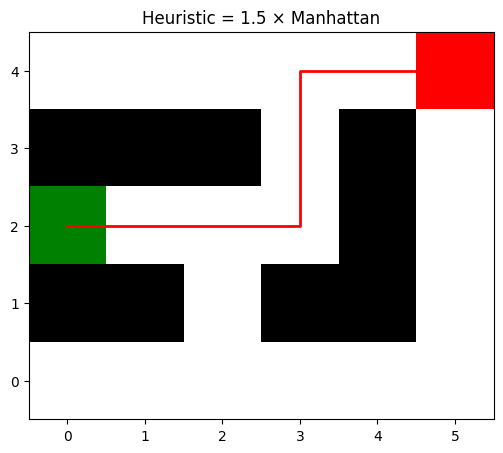

In [6]:
# --- Case 1: Weighted Manhattan (1.5 × L1) ---
end_point = locate_position(example_grid, 'B')
weighted_heuristic = lambda node: 1.5 * manhattan(node, end_point)

path_case1, cost_case1 = run_astar(example_grid, weighted_heuristic)
optimal_cost = run_ucs(example_grid)

print("Heuristic: 1.5 × Manhattan")
print("Path:", path_case1)
print("Cost:", cost_case1)
print("Optimal Cost:", optimal_cost, "| Optimal?:", cost_case1 == optimal_cost)

show_grid(example_grid, path_case1, title="Heuristic = 1.5 × Manhattan")


Heuristic: 2 × Manhattan
Path: [(2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5)]
Cost: 7
Optimal Cost: 7 | Optimal?: True


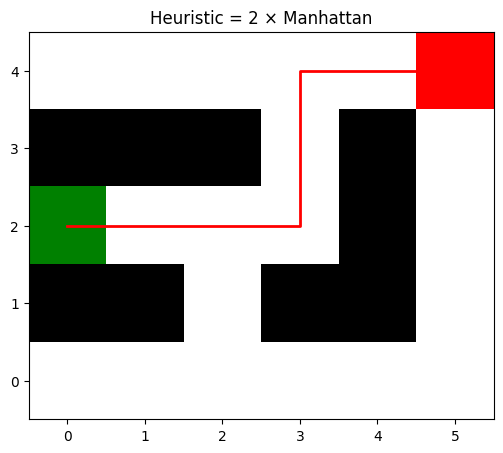

In [7]:
# --- Case 2: Weighted Manhattan (2 × L1) ---
end_point = locate_position(example_grid, 'B')
heuristic_w2 = lambda node: 2 * manhattan(node, end_point)

path_case2, cost_case2 = run_astar(example_grid, heuristic_w2)
optimal_cost = run_ucs(example_grid)

print("Heuristic: 2 × Manhattan")
print("Path:", path_case2)
print("Cost:", cost_case2)
print("Optimal Cost:", optimal_cost, "| Optimal?:", cost_case2 == optimal_cost)

show_grid(example_grid, path_case2, title="Heuristic = 2 × Manhattan")


Heuristic: 0.5 × Manhattan
Path: [(2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5)]
Cost: 7
Optimal Cost: 7 | Optimal?: True


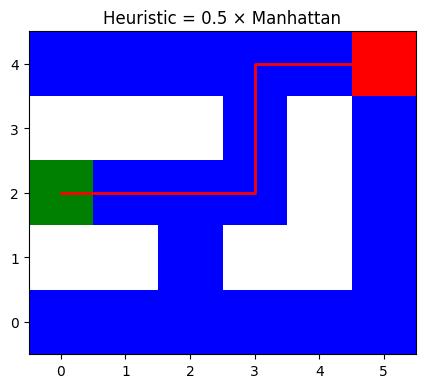

In [ ]:
# --- Case 3: Weighted Manhattan (0.5 × L1) ---
end_point = locate_position(example_grid, 'B')
heuristic_w05 = lambda node: 0.5 * manhattan(node, end_point)

path_case3, cost_case3 = run_astar(example_grid, heuristic_w05)
optimal_cost = run_ucs(example_grid)

print("Heuristic: 0.5 × Manhattan")
print("Path:", path_case3)
print("Cost:", cost_case3)
print("Optimal Cost:", optimal_cost, "| Optimal?:", cost_case3 == optimal_cost)

show_grid(example_grid, path_case3, title="Heuristic = 0.5 × Manhattan")


In [8]:
# --- Admissibility Checks for Different Heuristics ---
goal_pos = locate_position(example_grid, 'B')

def check_admissibility(grid, heuristic_func):
    """
    Verifies that the heuristic does not overestimate the true shortest distance
    from any node to the goal. Returns (True/False, list of violating nodes).
    """
    from collections import deque

    rows, cols = len(grid), len(grid[0])
    INF = float('inf')
    distances = [[INF for _ in range(cols)] for _ in range(rows)]

    goal_r, goal_c = goal_pos
    distances[goal_r][goal_c] = 0
    queue = deque([(goal_r, goal_c)])

    # Reverse BFS from goal to get actual shortest distances
    while queue:
        r, c = queue.popleft()
        for nr, nc in get_neighbors(grid, r, c):
            if distances[nr][nc] > distances[r][c] + 1:
                distances[nr][nc] = distances[r][c] + 1
                queue.append((nr, nc))

    is_admissible = True
    violations = []

    for r in range(rows):
        for c in range(cols):
            if grid[r][c] != 1:  # skip walls
                heuristic_val = heuristic_func((r, c))
                true_cost = distances[r][c]
                if true_cost == INF:
                    continue  # unreachable node
                if heuristic_val > true_cost + 1e-9:
                    is_admissible = False
                    violations.append(((r, c), heuristic_val, true_cost))

    return is_admissible, violations

# --- Check all heuristics ---
# Re-define heuristics using refactored `manhattan` and `locate_position`
end_point = locate_position(example_grid, 'B')
heuristic_base   = lambda node: manhattan(node, end_point)
heuristic_w15    = lambda node: 1.5 * manhattan(node, end_point)
heuristic_w2     = lambda node: 2.0 * manhattan(node, end_point)
heuristic_w05    = lambda node: 0.5 * manhattan(node, end_point)

adm_case0, viol_case0 = check_admissibility(example_grid, heuristic_base)
adm_case1, viol_case1 = check_admissibility(example_grid, heuristic_w15)
adm_case2, viol_case2 = check_admissibility(example_grid, heuristic_w2)
adm_case3, viol_case3 = check_admissibility(example_grid, heuristic_w05)

# --- Print Results ---
print("Admissible (1.0× Manhattan)?", adm_case0, "| Violations:", viol_case0[:3])
print("Admissible (1.5× Manhattan)?", adm_case1, "| Violations (first 3):", viol_case1[:3])
print("Admissible (2.0× Manhattan)?", adm_case2, "| Violations (first 3):", viol_case2[:3])
print("Admissible (0.5× Manhattan)?", adm_case3, "| Violations (first 3):", viol_case3[:3])


Admissible (1.0× Manhattan)? True | Violations: []
Admissible (1.5× Manhattan)? False | Violations (first 3): [((0, 0), 13.5, 9), ((0, 1), 12.0, 8), ((0, 2), 10.5, 7)]
Admissible (2.0× Manhattan)? False | Violations (first 3): [((0, 0), 18.0, 9), ((0, 1), 16.0, 8), ((0, 2), 14.0, 7)]
Admissible (0.5× Manhattan)? True | Violations (first 3): []
